In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from lab.agents import QLearningAgent
from lab.core import Experiment

%matplotlib inline

## Running an experiment

In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
agent = QLearningAgent(
    num_actions=env.action_space.n,
    num_states=env.observation_space.n,
    learning_rate=0.1,
    exploration_rate=0.5,
    discount_factor=0.99
)

In [4]:
experiment = Experiment(
    environment=env,
    agent=agent,
    num_iterations=250,
    train_steps=100,
    eval_steps=100,
    max_steps_per_episode=100,
    seed=0
)

In [5]:
stats = experiment.run()

## Plotting the results

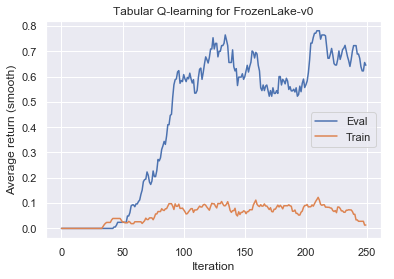

In [6]:
def smooth(x, window_length):
    num_left_vals = window_length // 2
    num_right_vals = window_length // 2
    if window_length % 2 == 0:
        num_left_vals -= 1
    x_left = np.ones(num_left_vals) * x[0]
    x_right = np.ones(num_right_vals) * x[-1]
    x_extended = np.r_[x_left, x, x_right]
    window = np.ones(window_length, 'd') / window_length
    return np.convolve(x_extended, window, mode='valid')

window_size = 15
eval_returns = smooth(stats['eval_average_returns'], window_size)
train_returns = smooth(stats['train_average_returns'], window_size)

sns.set()
fig, ax = plt.subplots()
sns.lineplot(
    x=range(len(eval_returns)),
    y=eval_returns,
    ax=ax,
    label='Eval'
)
sns.lineplot(
    x=range(len(train_returns)),
    y=train_returns,
    ax=ax,
    label='Train'
)
ax.legend(loc='right')
plt.title('Tabular Q-learning for FrozenLake-v0')
plt.ylabel('Average return (smooth)')
plt.xlabel('Iteration')
plt.show()